<a href="https://colab.research.google.com/github/hadeelfarash/Prediction_of_Product_Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


# Prediction of Product Sales
- Author : Hadeel Farash


# Project Overview

# Load and Inspect Data


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Read the Data
import pandas as pd
fname="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(fname)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean Data

In [29]:
# Check for Duplicated data
duplicated_rows = df.duplicated()
# Count the duplicates
df.duplicated().sum()


0

In [ ]:
# Check for how many unique values are in each column
df.nunique()
# What is the percentage of unique values in each column
df.nunique() / len(df) * 100

In [31]:
# Identify if a value is null or not
df.isna()
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# Check the datatype
type(null_sums)

pandas.core.series.Series

In [33]:
# Get the % of null values
null_percent = null_sums/len(df) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [34]:
# Viewing only columns with null values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [38]:
# Dropping Null values from Item_Weight
df = df.dropna(subset=["Item_Weight"])

# Dropping Null values from Outlet_Size
df = df.dropna(subset=["Outlet_Size"])

# Confirming no more null
df['Item_Weight'].isna().sum()
df['Outlet_Size'].isna().sum()

0

In [ ]:
df.info()


In [44]:
# Check for inconsistency in categorical values
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [48]:

# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')


Value Counts for Item_Identifier
FDH26    5
FDL51    5
FDJ09    5
FDB15    5
FDC17    5
        ..
FDE40    1
FDF50    1
NCA42    1
FDK32    1
FDO03    1
Name: Item_Identifier, Length: 1535, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT018    928
Name: Outlet_

In [49]:
  # Standardize the values in the Central column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':"Low Fat",'reg':'Regular',})
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [59]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Exploratory Data Analysis

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [63]:
# create a hist of numeric colom
int_cols = df.select_dtypes("int").columns
float_cols = df.select_dtypes("float").columns


Index(['Outlet_Establishment_Year'], dtype='object')

Text(0, 0.5, 'Number of Item')

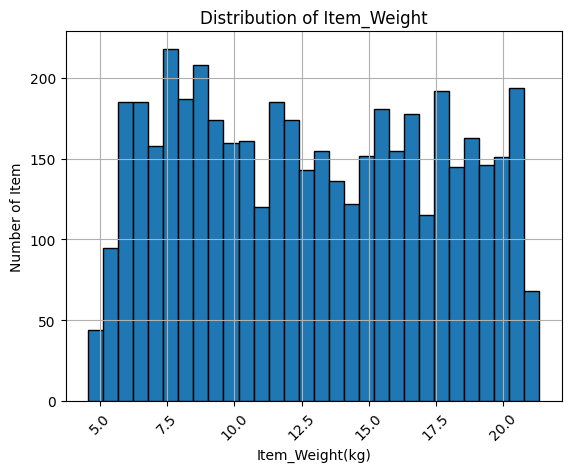

In [58]:
# create a hist of Item_Weight colom

ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item_Weight')
ax.set_xlabel('Item_Weight(kg)')
ax.set_ylabel('Number of Item')

Text(0, 0.5, 'Number of Item')

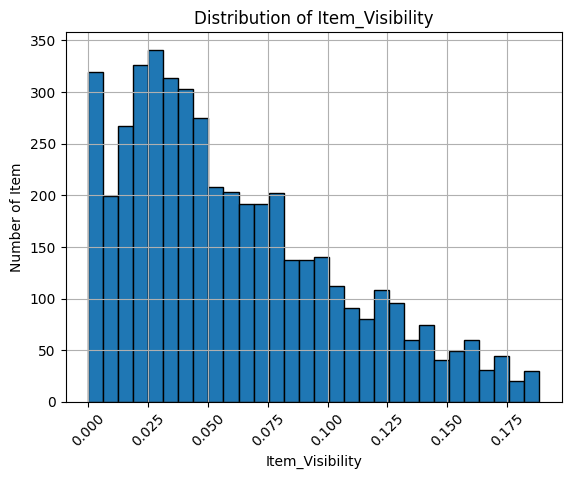

In [60]:
# create a hist of Item_Visibility colom

ax = df['Item_Visibility'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item_Visibility')
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Number of Item')

Text(0, 0.5, 'Number of Item')

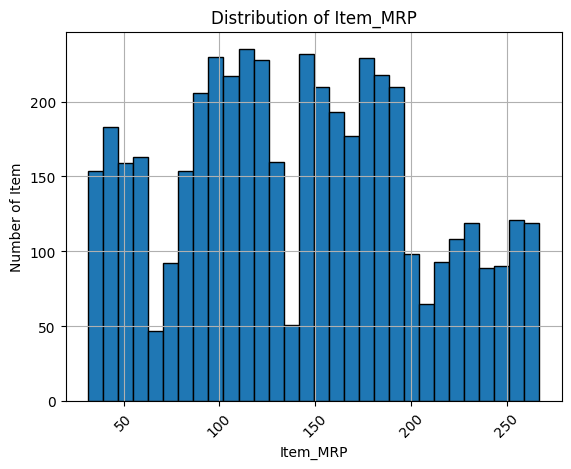

In [61]:
# create a hist of Item_MRP colom

ax = df['Item_MRP'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item_MRP')
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Number of Item')

Text(0, 0.5, 'Number of Item')

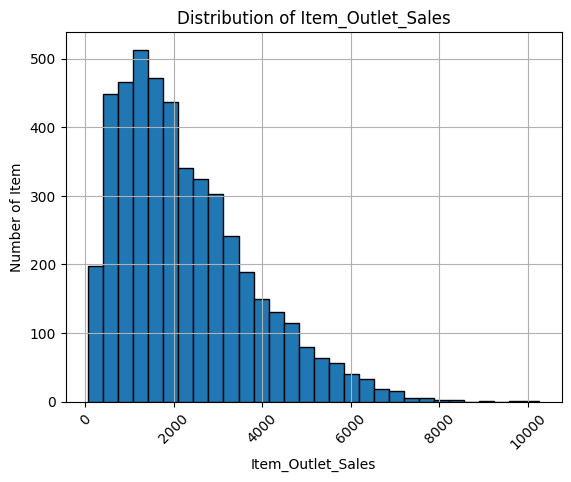

In [62]:
# create a hist of Item_Outlet_Sales colom

ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item_Outlet_Sales')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Number of Item')

Text(0, 0.5, 'Number of Item')

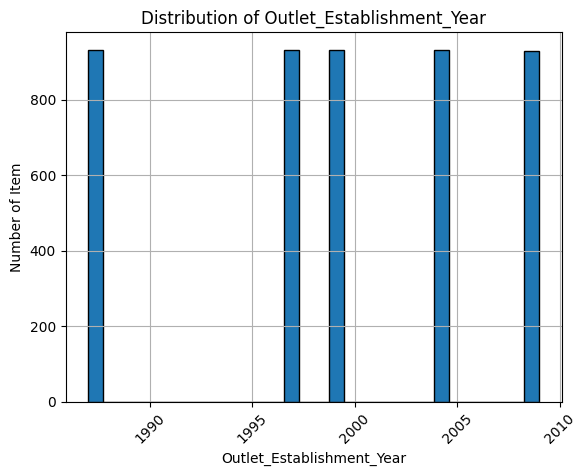

In [64]:
# create a hist of Outlet_Establishment_Year colom

ax = df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Outlet_Establishment_Year')
ax.set_xlabel('Outlet_Establishment_Year')
ax.set_ylabel('Number of Item')

# Feature Inspection